# Variables

Esta tabla contiene la información de los expresiones Variables.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

full_table = get_data('variables')

# Table name, features and target.
TABLE_NAME = 'variables'
TABLE_FEATURES = ['variable__name_convention', 'variable__number_of_characters', 'variable__is_private', 'variable__is_magic', 'variable__expertise_level']
TABLE_TARGET = 'variable__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-07-05 19:00:44.856441 Data cache files found ...
2024-07-05 19:00:47.880779 Data cache files successfully loaded!!
Features shape: (2782098, 5)
Target shape: (2782098,)
As we can see the downloaded data contains a total of 2782098 instances. For each instance we have 5 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2782098 entries, 0 to 2782097
Data columns (total 5 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   variable__name_convention       object
 1   variable__number_of_characters  int64 
 2   variable__is_private            bool  
 3   variable__is_magic              bool  
 4   variable__expertise_level       object
dtypes: bool(2), int64(1), object(2)
memory usage: 69.0+ MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 2782098 entries, 0 to 2782097
Series name: variable__expertise_level
Non-Null Count    Dtype 
--------------    ----- 
2782098 non-null  object
dtypes: object(1)
memory usage: 21.2+ MB
None


Cómo podemos ver la tabla está compuesta por 1 variable numérica, 2 variables boleanas y 2 de tipo objeto.

### 2.1 - Equilibrado de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 41.17% instances for BEGINNER class and 58.83% for EXPERT class.


### 2.2 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

variable__name_convention         0
variable__number_of_characters    0
variable__is_private              0
variable__is_magic                0
variable__expertise_level         0
dtype: int64

In [5]:
print_empty_cols(X)

variable__name_convention
-------------------------
0 instancias no tienen un valor para la columna variable__name_convention


variable__number_of_characters
------------------------------
0 instancias no tienen un valor para la columna variable__number_of_characters


variable__is_private
--------------------
0 instancias no tienen un valor para la columna variable__is_private


variable__is_magic
------------------
0 instancias no tienen un valor para la columna variable__is_magic


variable__expertise_level
-------------------------
0 instancias no tienen un valor para la columna variable__expertise_level




### 2.3 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
variable__name_convention,2782098,7,Lower,1813631,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__number_of_characters,2782098.0,NaN,NaN,NaN,7.120211,5.180447,1.0,4.0,5.0,10.0,82.0
variable__is_private,2782098,2,False,2738110,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__is_magic,2782098,2,False,2763564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
variable__expertise_level,2782098,2,EXPERT,1636752,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "variable__number_of_characters": [(0.0, 4.0), (4.0, 4.0), (4.0, 10.0), (10.0, inf)], # min: 0 ; max: 82
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['variable__number_of_characters'], 10))
print(get_statistics(full_table, ['variable__name_convention'], 10))
print(get_statistics(X_copy, ['variable__is_private'], 10))
print(get_statistics(X_copy, ['variable__is_magic'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(full_table, ['variable__is_magic', 'variable__name_convention_Discard'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
variable__number_of_characters  count  percentage
                    [4.0_10.0) 953793   34.283228
                    [10.0_inf] 705281   25.350689
                     [0.0_4.0) 580024   20.848439
                     [4.0_4.0] 543000   19.517645

variable__name_convention   count  percentage
                    Lower 1813631   65.189328
                SnakeCase  594525   21.369664
                  CamelUp  207822    7.469974
                    Upper   80184    2.882141
                 CamelLow   65302    2.347221
         NoNameConvention   12354    0.444053
                  Discard    8280    0.297617

 variable__is_private   count  percentage
                False 2738110   98.418891
                 True   43988    1.581109

 variable__is_magic   count  percentage
              False 2763564   99.333812
               True   18534    0.666188

--- TWO FEATURES ---
--- THREE FEATURES ---


In [8]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (2782098, 12)
Target shape: (2782098,)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

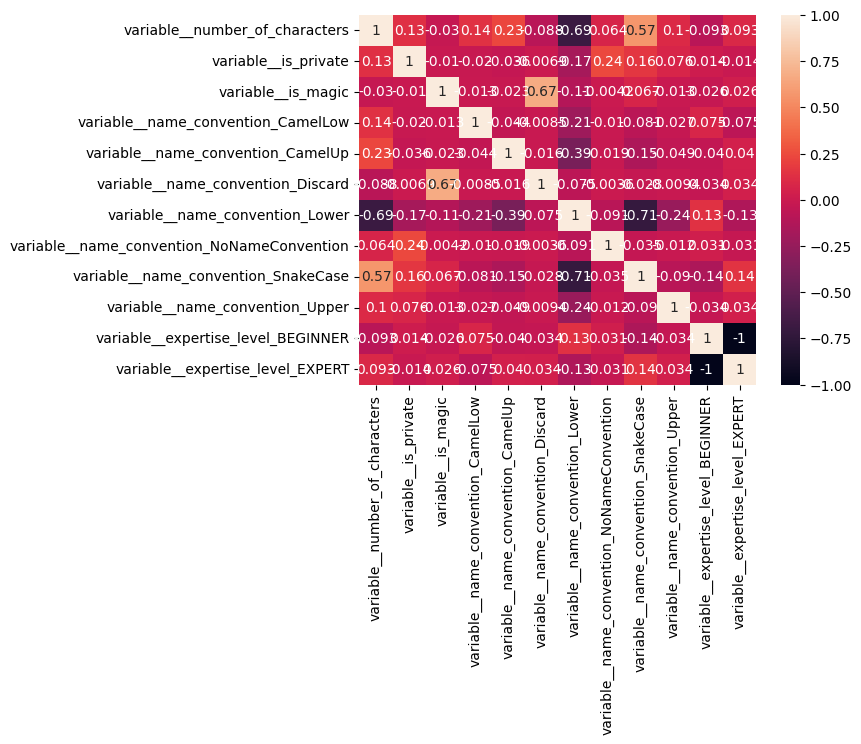

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 4 variables (1 numerica, 2 booleanas y 1 categorica) se hara un analisis detallado

### Variable is_private (1/4)
Esta variable es de tipo booleano y representa si la variable es privada.

<Axes: xlabel='variable__is_private', ylabel='Count'>

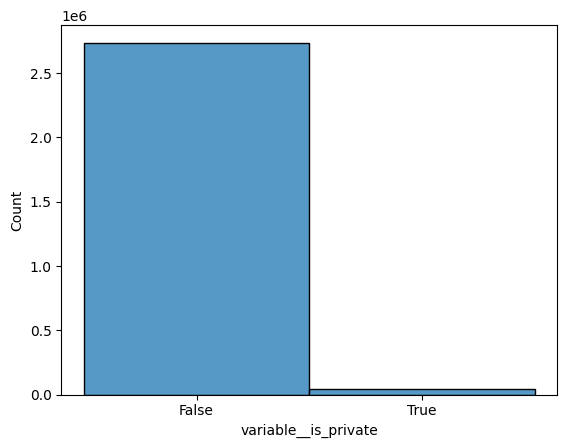

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_private'], discrete=True)

In [11]:
num_true_values = len(X[X['variable__is_private'] == True])
num_false_values = len(X[X['variable__is_private'] == False])
std = X['variable__is_private'].std()
freq_true = len(X[X['variable__is_private'] == True]) / len(X['variable__is_private'])
freq_false = len(X[X['variable__is_private'] == False]) / len(X['variable__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 43988 valores verdaderos y 2738110 valores falsos. Y, la desviación típica es de 0.12474415451288223
La frecuencia con la que programa puede tener la variable is_private a True es 0.01581108932898841.
La frecuencia con la que programa puede tener la variable is_private a False es 0.9841889106710116.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_private', possible_values)

La variable variable__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_private toma el valor de 0.0 en un 98.42% de los items.
La variable variable__is_private toma el valor de 1.0 en un 1.581% de los items.


In [13]:
X[X['variable__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_EXPERT
count,43988.000000,43988.0,43988.0,43988.0,43988.0,43988.0,43988.0,43988.000000,43988.000000,43988.000000,43988.000000,43988.000000
mean,13.581727,1.0,0.0,0.0,0.0,0.0,0.0,0.128990,0.742043,0.128967,0.467946,0.532054
std,7.049422,0.0,0.0,0.0,0.0,0.0,0.0,0.335192,0.437515,0.335167,0.498977,0.498977
min,2.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,1.000000
75%,18.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000
max,53.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable is_magic (2/4)
Esta variable es de tipo booleano y representa si la variable es magic.

<Axes: xlabel='variable__is_magic', ylabel='Count'>

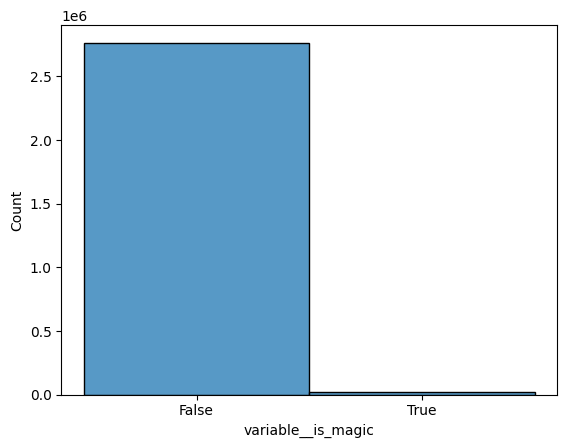

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['variable__is_magic'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['variable__is_magic'] == True])
num_false_values = len(X[X['variable__is_magic'] == False])
std = X['variable__is_magic'].std()
freq_true = len(X[X['variable__is_magic'] == True]) / len(X['variable__is_magic'])
freq_false = len(X[X['variable__is_magic'] == False]) / len(X['variable__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 18534 valores verdaderos y 2763564 valores falsos. Y, la desviación típica es de 0.08134801685810089
La frecuencia con la que programa puede tener la variable is_magic a True es 0.0066618789129642446.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9933381210870358.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'variable__is_magic', possible_values)

La variable variable__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable variable__is_magic toma el valor de 0.0 en un 99.33% de los items.
La variable variable__is_magic toma el valor de 1.0 en un 0.6662% de los items.


In [17]:
X[X['variable__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_EXPERT
count,18534.000000,18534.0,18534.0,18534.0,18534.0,18534.000000,18534.0,18534.000000,18534.00000,18534.000000,18534.000000,18534.000000
mean,5.020449,0.0,1.0,0.0,0.0,0.446747,0.0,0.001025,0.55007,0.002158,0.252671,0.747329
std,3.746422,0.0,0.0,0.0,0.0,0.497169,0.0,0.032002,0.49750,0.046407,0.434555,0.434555
min,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000
50%,7.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,1.00000,0.000000,0.000000,1.000000
75%,8.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,1.00000,0.000000,1.000000,1.000000
max,25.000000,0.0,1.0,0.0,0.0,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000


### Variable number_of_characters (3/4)
Esta variable representa el número de caracteres del nombre de la variable. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 82. Con una media de 7.12.

<Axes: ylabel='variable__number_of_characters'>

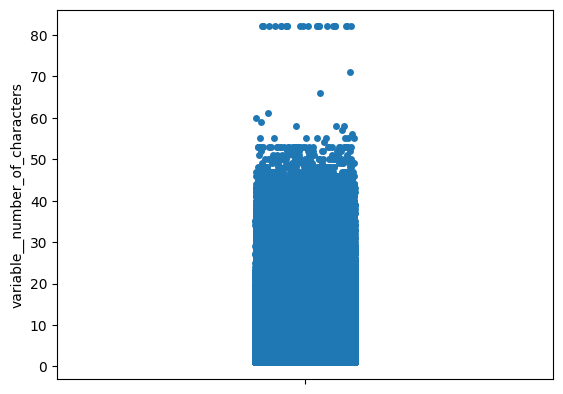

In [18]:
sns.stripplot(X['variable__number_of_characters'])

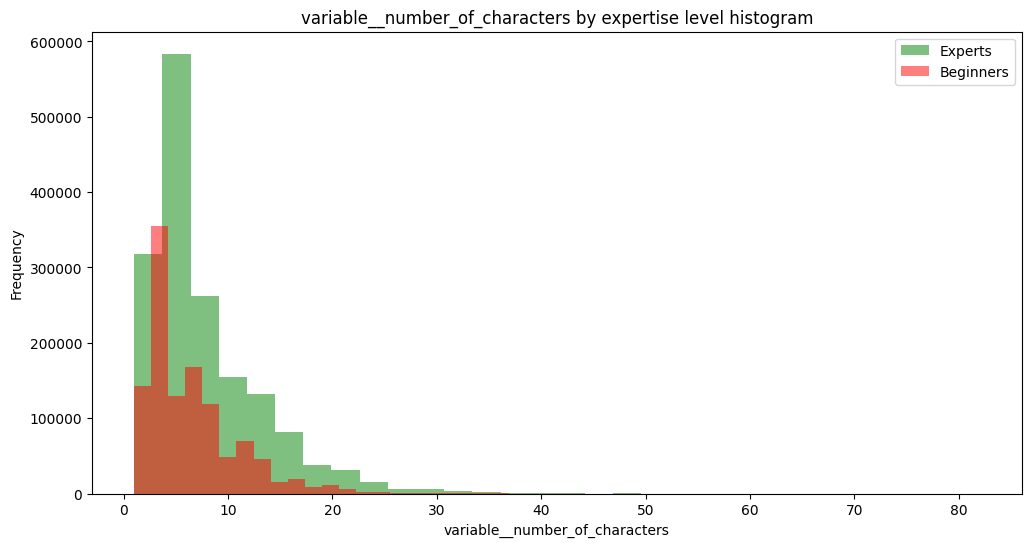

In [19]:
print_histogram(X, 'variable__number_of_characters', 'fstring__expertise_level', bins=30, include_all=True, include_beginners=False, include_experts=False, max_value=60)
print_histogram(X, 'variable__number_of_characters', 'variable__expertise_level', bins=30, include_all=False, max_value=60)

In [20]:
print_outliers_for_df_column(X, 'variable__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.735176793606983
Rango valores atípicos extremos (Tukey): [-14.0,28.0]
Rango valores atípicos leves (Tukey): [-5.0,19.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.313325020785852,180.36305061428197]
-3.0IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -14.0 (Q1-3*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para variable__number_of_characters inferior a -5.0 (Q1-1.5*IQR) para variable__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 84403 instancias tienen un valor para variable__number_of_characters superior a 19.0 (Q3+1.5*IQR) para variable__number_of_characters. Representando un 3.034% del total de instancias.
+3.0IQR: 12404 instancias tienen un valor para variable__number_of_characters superior a 28.0 (Q3-3*IQR) para variable__number_of_characters. Representando un 0.4459%

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 28.0 (Con un MC de 73 usamos Tuckey Extremo)

In [21]:
X[X['variable__number_of_characters'] > 28].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,variable__number_of_characters,variable__is_private,variable__is_magic,variable__name_convention_CamelLow,variable__name_convention_CamelUp,variable__name_convention_Discard,variable__name_convention_Lower,variable__name_convention_NoNameConvention,variable__name_convention_SnakeCase,variable__name_convention_Upper,variable__expertise_level_BEGINNER,variable__expertise_level_EXPERT
count,12404.000000,12404.000000,12404.0,12404.000000,12404.000000,12404.0,12404.0,12404.000000,12404.000000,12404.000000,12404.000000,12404.000000
mean,33.542728,0.128749,0.0,0.009432,0.137456,0.0,0.0,0.034586,0.483070,0.335456,0.134876,0.865124
std,4.951757,0.334935,0.0,0.096666,0.344342,0.0,0.0,0.182735,0.499733,0.472169,0.341605,0.341605
min,29.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,32.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,35.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,1.000000
max,82.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable name_convention (4/4)
Esta variable es de tipo categorica y representa el name convention del nombre de la variable.

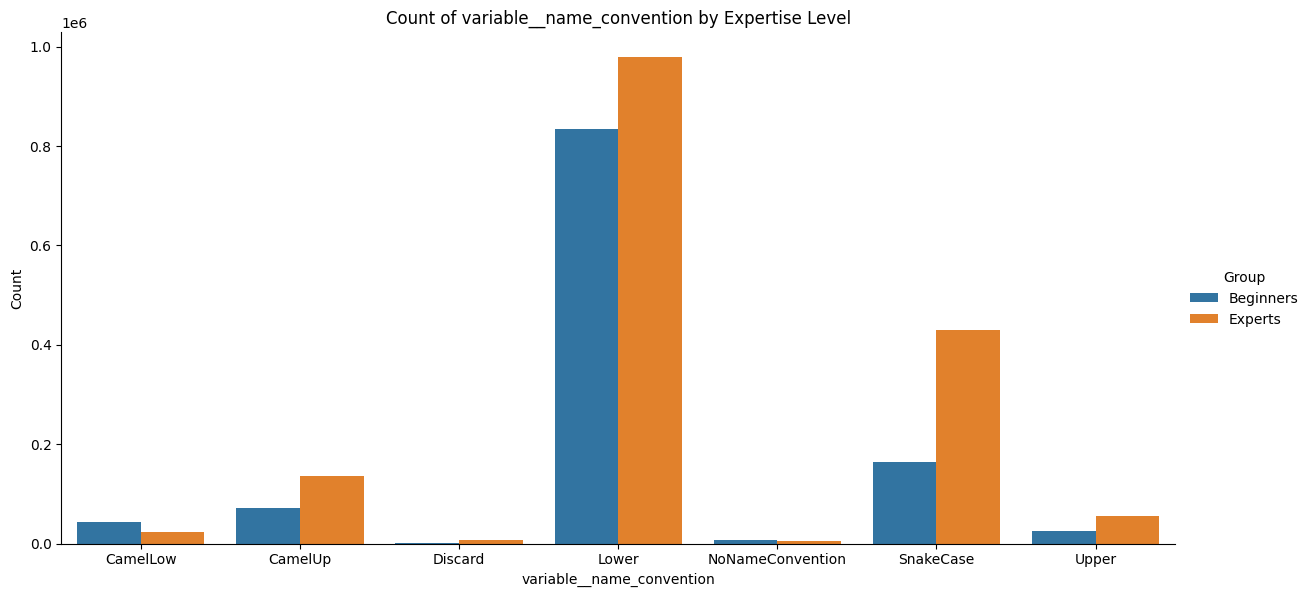

In [28]:
print_categorical_histogram(full_table, 'variable__name_convention',TABLE_TARGET, include_all=False)

In [23]:
print_frequency_anal_for_cat_var(full_table, 'variable__name_convention')

La variable variable__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable variable__name_convention toma el valor de Lower en un 65.19% de los items.
La variable variable__name_convention toma el valor de SnakeCase en un 21.37% de los items.
La variable variable__name_convention toma el valor de CamelUp en un 7.47% de los items.
La variable variable__name_convention toma el valor de Upper en un 2.882% de los items.
La variable variable__name_convention toma el valor de CamelLow en un 2.347% de los items.
La variable variable__name_convention toma el valor de NoNameConvention en un 0.4441% de los items.
La variable variable__name_convention toma el valor de Discard en un 0.2976% de los items.


In [24]:
print_values_usage_for_cat_var(full_table, 'variable__name_convention', NAMING_CONVENTION_VALUES)

La variable variable__name_convention puede tomar 7 valores distintos
	7 (100.0%) valores utilizados
	0 (0.0%) valores NO utilizados


## Multivariate

Isolation forest algorithm

In [25]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,variable__name_convention,variable__number_of_characters,variable__is_private,variable__is_magic,variable__expertise_level
3322,SnakeCase,27,True,False,BEGINNER
3775,NoNameConvention,34,True,False,BEGINNER
3829,NoNameConvention,34,True,False,BEGINNER
4549,SnakeCase,25,True,False,BEGINNER
4553,SnakeCase,26,True,False,BEGINNER
...,...,...,...,...,...
2685798,Upper,26,True,False,EXPERT
2685821,Upper,26,True,False,EXPERT
2685844,Upper,26,True,False,EXPERT
2685865,Upper,26,True,False,EXPERT


### IMPORTANTE
Revisar los outliers detectados.

In [26]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,3074.0,24.310020,5.635055,16.0,20.0,24.0,28.0,48.0
variable__is_private,3074.0,0.996747,0.056952,0.0,1.0,1.0,1.0,1.0
variable__is_magic,3074.0,0.003253,0.056952,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,3074.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_CamelUp,3074.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Discard,3074.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_Lower,3074.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
variable__name_convention_NoNameConvention,3074.0,0.394275,0.488774,0.0,0.0,0.0,1.0,1.0
variable__name_convention_SnakeCase,3074.0,0.296031,0.456579,0.0,0.0,0.0,1.0,1.0
variable__name_convention_Upper,3074.0,0.309694,0.462443,0.0,0.0,0.0,1.0,1.0


In [27]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
variable__number_of_characters,2779024.0,7.101195,5.148242,1.0,4.0,5.0,10.0,82.0
variable__is_private,2779024.0,0.014726,0.120454,0.0,0.0,0.0,0.0,1.0
variable__is_magic,2779024.0,0.006666,0.081371,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelLow,2779024.0,0.023498,0.151479,0.0,0.0,0.0,0.0,1.0
variable__name_convention_CamelUp,2779024.0,0.074782,0.263040,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Discard,2779024.0,0.002979,0.054503,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Lower,2779024.0,0.652614,0.476140,0.0,0.0,1.0,1.0,1.0
variable__name_convention_NoNameConvention,2779024.0,0.004009,0.063192,0.0,0.0,0.0,0.0,1.0
variable__name_convention_SnakeCase,2779024.0,0.213606,0.409852,0.0,0.0,0.0,0.0,1.0
variable__name_convention_Upper,2779024.0,0.028511,0.166427,0.0,0.0,0.0,0.0,1.0
